<a href="https://colab.research.google.com/github/espartaca75-prog/LMC--FCE---UBA/blob/main/0_intro_clase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos con énfasis en DataFrames

<hr>
<br>

Nos vamos a centrar en la parte de análisis de datos y vamos a utilizar librerías estándar de Python para la visualización de datos, como matplotlib y seaborn.

El notebook utiliza un conjunto de datos relacionado con el modelado de riesgo crediticio.


In [ ]:
#imoprtamos las llibrerías de hoy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# El dataset HMEQ
Nuestro conjunto de datos, denominado "Home Equity" o, abreviado, conjunto de datos HMEQ, es proporcionado por www.creditriskanalytics.net. Comprende información sobre un grupo de prestatarios, categorizados según variables demográficas y variables relativas a su relación comercial con el prestamista. Se proporciona una variable objetivo binaria denominada "BAD" que indica si el prestatario ha pagado su deuda. Puede considerar los datos como un caso de uso estándar de clasificación binaria.

Pueden obtener los datos, junto con otros conjuntos de datos financieros interesantes, directamente desde www.creditriskanalytics.net. El sitio web también ofrece una breve descripción del conjunto de datos. En concreto, el conjunto de datos consta de 5960 observaciones y 13 características, incluida la variable objetivo. Las variables se definen de la siguiente manera:

- BAD: variable objetivo, 1=incumplimiento; 0=no incumplimiento
- LOAN: importe de la solicitud de préstamo
- MORTDUE: importe adeudado de una hipoteca existente
- VALUE: valor de la propiedad actual
- REASON: DebtCon=consolidación de deuda; HomeImp=reformas del hogar
- JOB: categorías ocupacionales
- YOJ: años en el trabajo actual
- DEROG: número de informes negativos importantes
- DELINQ: número de líneas de crédito morosas
- CLAGE: antigüedad de la línea de crédito más antigua en meses
- NINQ: número de consultas de crédito recientes
- CLNO: número de líneas de crédito
- DEBTINC: ratio deuda-ingresos

## Carga de datos
Comencemos cargando los datos y analizando algunas entradas.

In [ ]:
# cargamos los datos desde el local

hmeq = pd.read_csv('/content/hmeq.csv')

# ignoren esto
hmeq.JOB = hmeq.JOB.astype('category')
hmeq.REASON = hmeq.REASON.astype('category')
hmeq.LOAN = hmeq.LOAN.astype('float64')
hmeq.BAD = hmeq.BAD.astype('bool')

# Preview
hmeq

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,True,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,True,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,True,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,True,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,False,88900.0,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,False,89000.0,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,False,89200.0,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,False,89800.0,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


## Pandas


In [ ]:
#resumir columnas (ej; features)
# y obtener información central
hmeq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   bool    
 1   LOAN     5960 non-null   float64 
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: bool(1), category(2), float64(10)
memory usage: 483.6 KB


In [ ]:
#resumen estadístico de los datos
hmeq.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


Observen los índices de fila en la salida del `.describe()`. Indican las estadísticas descriptivas calculadas. Por ejemplo, el índice de fila 'mean' muestra el valor medio de cada característica, y `.describe()` ignora las características no numéricas por defecto.

### Miniejercicio
Interpretar la salida del método `.describe()` es complicado debido a que los números se muestran con alta precisión. Apliquen el método `.round()` a la salida para redondear los números a 2 dígitos de precisión.

In [ ]:
# solución
hmeq.describe().round(2)

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.00,5442.00,5848.00,5445.00,5252.00,5380.00,5652.00,5450.00,5738.00,4693.00
mean,18607.97,73760.82,101776.05,8.92,0.25,0.45,179.77,1.19,21.30,33.78
std,11207.48,44457.61,57385.78,7.57,0.85,1.13,85.81,1.73,10.14,8.60
min,1100.00,2063.00,8000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.52
25%,11100.00,46276.00,66075.50,3.00,0.00,0.00,115.12,0.00,15.00,29.14
50%,16300.00,65019.00,89235.50,7.00,0.00,0.00,173.47,1.00,20.00,34.82
75%,23300.00,91488.00,119824.25,13.00,0.00,0.00,231.56,2.00,26.00,39.00
max,89900.00,399550.00,855909.00,41.00,10.00,15.00,1168.23,17.00,71.00,203.31


### Ejercicio 1:
¿Qué información podemos obtener de las estadísticas descriptivas? ¿Qué nos dicen los números sobre el conjunto de datos? Anoten sus observaciones en la celda de Markdown a continuación.

Espacio para que anoten:
- ...
- ...
- ...

### Exploremos
En Pandas, Numpy y otras bibliotecas, la indexación y la segmentación son importantes. Acá hay algunas demostraciones adicionales sobre formas comunes de usar la indexación en Pandas. Si les interesa, pueden buscar "indexación de marcos de datos de Pandas" para obtener más información.

### Indexación básica de filas y columnas

In [ ]:
#acceder a una columna por el nombre
hmeq['BAD']
#alternativamente, pueden usar el puntito
hmeq.BAD

,BAD
0,True
1,True
2,True
3,True
4,False
...,...
5955,False
5956,False
5957,False
5958,False


Para acceder a filas o columnas usando un índice numérico, podemos usar `iloc[]`.

In [ ]:
#usamos .iloc
hmeq.iloc[0:4, 0]  #selecciona filas 0, 1, 2, 3 ay para esas filas solo la primera columna
hmeq.iloc[0:4, [0, 3, 5]]  # selecciona filas 0, 1, 2, 3 y para esas filas solo las columnas 0, 3, 5
hmeq.iloc[0:4, np.arange(4)]  # selecciona filas 0, 1, 2, 3 y para esas filas solo las primera cuatro columnas

,BAD,LOAN,MORTDUE,VALUE
0,True,1100.0,25860.0,39025.0
1,True,1300.0,70053.0,68400.0
2,True,1500.0,13500.0,16700.0
3,True,1500.0,NaN,NaN


Algunas advertencias sobre la indexación numérica en Python. `loc()` considera el índice del Dataframe. En la salida anterior, esta es la columna más a la izquierda sin encabezado. No hemos definido un índice de fila personalizado y Python usa números enteros consecutivos por defecto. Por lo tanto, las llamadas a `loc()` e `iloc()` parecen más similares de lo que son. Un DataFrame también podría tener un índice personalizado. Por ejemplo, el marco de datos devuelto al llamar a `describe()` (ver arriba) usa un índice de fila personalizado con los valores *count*, *mean*, *std*, etc. Para comprender mejor las diferencias en la indexación de DataFrames, resuelvan el siguiente ejercicio.

#### Ejercicio 2:
- Ejecuten el comando `df = hmeq.describe()` para crear un nuevo marco de datos `df` que almacene el resultado del método `describe()`.
- Usen el método `df.loc[]` para acceder a la desviación estándar de la característica MORTDUE. Impriman el resultado. - Utilicen el método `df.iloc[]` para acceder e imprimir la misma cifra, es decir, la desviación estándar de la característica MORTDUE.
- Utilicen `loc[]` para acceder e imprimir la media de las características LOAN, VALUE y DEROG.
- Utilicen `iloc[]` para acceder e imprimir el valor mínimo de todas las características. Utilicen el operador `:` para seleccionar todas las columnas.
- Utilicen `loc[]` para acceder e imprimir los valores del primer, segundo y tercer cuartil de la distribución de las características LOAN, YOJ y DEBTINC.

In [ ]:
# ejercicio 2
df=hmeq.describe()
std_mortdue=df.loc['std', 'MORTDUE']
std1_mortdue=df.iloc[3,2]
means=df.loc['mean',['LOAN','VALUE','DEROG']]
mins=df.loc['min',:]
quarts=df.loc[['25%','50%','75%'],['LOAN','YOJ','DEBTINC']]

print(f"Desviación estándar de MORTDUE usando loc: {std_mortdue}")
print(f"Desviación estándar de MORTDUE usando iloc: {std1_mortdue}")
print(f"Media de LOAN, VALUE, DEROG: {means}")
print(f"Mínimo de todas las características: {mins}")
print(f"Cuartiles de LOAN, YOJ, DEBTINC: {quarts}")

Desviación estándar de MORTDUE usando loc: 44457.60945841592
Desviación estándar de MORTDUE usando iloc: 8000.0
Media de LOAN, VALUE, DEROG: LOAN      18607.969799
VALUE    101776.048741
DEROG         0.254570
Name: mean, dtype: float64
Mínimo de todas las características: LOAN       1100.000000
MORTDUE    2063.000000
VALUE      8000.000000
YOJ           0.000000
DEROG         0.000000
DELINQ        0.000000
CLAGE         0.000000
NINQ          0.000000
CLNO          0.000000
DEBTINC       0.524499
Name: min, dtype: float64
Cuartiles de LOAN, YOJ, DEBTINC:         LOAN   YOJ    DEBTINC
25%  11100.0   3.0  29.140031
50%  16300.0   7.0  34.818262
75%  23300.0  13.0  39.003141


###Otras formas comunes de indexación y selección de subconjuntos
También es habitual seleccionar filas basándose en comparaciones de valores de características mediante `.loc`. Ejemplos:

In [ ]:
hmeq.loc[hmeq.BAD == True, :]  # Obtiene todas las observaciones con la variable BAD = 1. El : significa que desea recuperar todas las columnas

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,True,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,True,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,True,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,True,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,True,1700.0,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,True,72300.0,NaN,85000.0,DebtCon,Other,1.0,0.0,0.0,117.166667,9.0,23.0,NaN
5931,True,75400.0,NaN,89609.0,DebtCon,Other,1.0,0.0,0.0,115.763534,9.0,23.0,41.105569
5932,True,76500.0,38206.0,90000.0,DebtCon,Other,12.0,0.0,0.0,134.900000,0.0,26.0,NaN
5933,True,77200.0,83962.0,215000.0,HomeImp,Self,8.0,1.0,2.0,71.533132,3.0,14.0,NaN


In [ ]:
hmeq.loc[hmeq["NINQ"]>12, ["LOAN", "VALUE", "NINQ"]]  # Otro ejemplo donde seleccionamos solo un subconjunto de las columnas

,LOAN,VALUE,NINQ
44,3000.0,14500.0,14.0
2593,15000.0,26100.0,17.0
3661,19300.0,135000.0,13.0
4014,21000.0,136249.0,13.0


# Agrupación de datos
Agrupar datos es una operación común en el análisis de datos. Se suele utilizar en combinación con funciones como `sum()`, `mean()`, `count()`, etc. Sería muy interesante realizar este análisis por separado para los pagadores responsables y los pagadores irresponsables. Por ejemplo, una hipótesis plausible en la modelización del riesgo crediticio es que la relación deuda-ingresos (es decir, la característica DEBTINC) predice el riesgo crediticio. Por lo tanto, es de esperar que la relación deuda-ingresos media sea mayor para los pagadores responsables. La agrupación permite verificar dicha hipótesis.

El método `groupby()` de `Pandas` es una herramienta eficaz para agrupar datos.

In [ ]:
features = ["LOAN", "DEBTINC"]  # Definir una lista
print(hmeq.groupby("BAD")[features].mean())  # Caluclar la media de esos atributos de la lista para cada grupo de BAD
print('-' * 50)
print(hmeq.groupby("BAD")[features].std())
print('-' * 50)
print(hmeq.groupby("BAD")[features].quantile(q=0.95))

               LOAN    DEBTINC
BAD                           
False  19028.107315  33.253129
True   16922.119428  39.387645
--------------------------------------------------
               LOAN    DEBTINC
BAD                           
False  11115.758554   6.947482
True   11418.455152  17.723586
--------------------------------------------------
          LOAN    DEBTINC
BAD                      
False  39550.0  42.135485
True   41080.0  62.777490


# Atributos categóricos
Hasta ahora, nos hemos centrado en las características numéricas. Sin embargo, el conjunto de datos HMEQ también contiene atributos categóricos. En el contexto de la modelización del riesgo crediticio, las características REASON y JOB son de especial interés. El atributo REASON indica el motivo de la solicitud de préstamo, mientras que el atributo JOB indica la ocupación del prestatario.

Una pregunta típica del análisis de datos consiste en investigar la distribución de los atributos categóricos. Podemos utilizar `value_counts()` para contar el número de ocurrencias de cada categoría. Además, podemos utilizar la agrupación para examinar la distribución de los niveles de categoría entre los pagadores con y sin riesgo (es decir, los valores de nuestro objetivo).



In [ ]:
# examinemos la distribución de REASON
hmeq["REASON"].value_counts()

,count
REASON,
DebtCon,3928
HomeImp,1780


In [ ]:
# Crear una tabulación cruzada de las características BAD y REASON
pd.crosstab(hmeq.BAD, hmeq.REASON)

REASON,DebtCon,HomeImp
BAD,,
False,3183,1384
True,745,396


###Ejercicio 3:
- Consideren el atributo DEBTINC. Utilice el método `groupby()` para comparar la mediana de la relación deuda-ingresos entre los pagadores con y sin paga.
- Creen una tabla cruzada de las características BAD y JOB.
- Recreen la tabla cruzada de BAD vs. JOB. Asegúrense de que no muestre recuentos absolutos, sino frecuencias relativas.

In [ ]:
feature=['DEBTINC']
print(hmeq.groupby("BAD")[feature].mean())
pd.crosstab(hmeq.BAD,hmeq.JOB,normalize=True)


         DEBTINC
BAD             
False  33.253129
True   39.387645


JOB,Mgr,Office,Other,ProfExe,Sales,Self
BAD,,,,,,
False,0.103503,0.144869,0.322830,0.187291,0.012498,0.023763
True,0.031509,0.022003,0.097518,0.037317,0.006689,0.010209


# Visualizaciones comunes

## Histogramas y Count plots
Los histogramas son una herramienta de visualización común para comprender la distribución de características numéricas. En el contexto del modelado de riesgo crediticio, es importante comprender la distribución de características como DEBTINC, LOAN y VALUE.

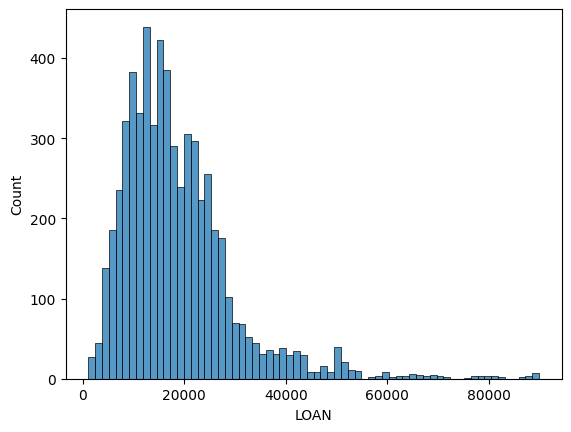

In [ ]:
# histograma de loan
sns.histplot(hmeq.LOAN)
plt.show()

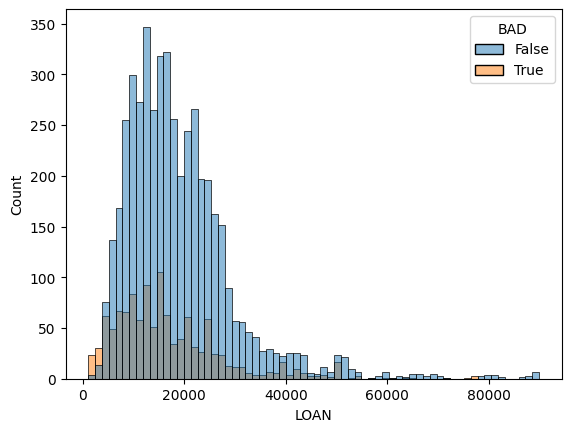

In [ ]:
# Agrupar el histograma de LOAN por la variable objetivo BAD y crear un histograma de LOAN
sns.histplot(data=hmeq, x='LOAN', hue='BAD')
plt.show()


### Ejercicio 4:
Los counplots son una herramienta de visualización similar al histograma, pero adecuados para categorías. Con `seaborn`, su creación sigue la misma lógica que la del ejemplo anterior. Pruébenlo:

- Creen un countplot para REASON.
- Creen otropara JOB, agrupada por la variable objetivo.

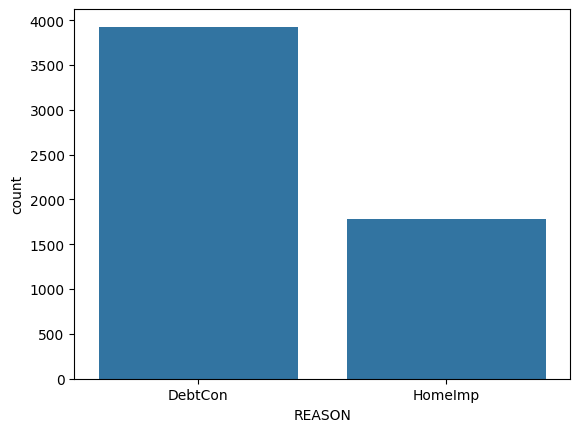

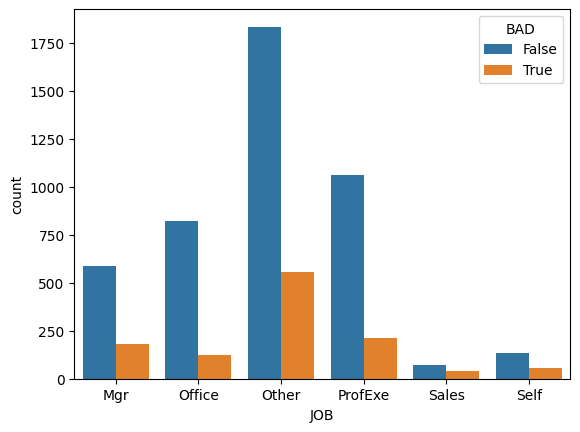

In [ ]:
sns.countplot(data=hmeq,x='REASON')
plt.show()
sns.countplot(data=hmeq,x='JOB',hue='BAD')
plt.show()

## Box plots
Los Boxplots son una herramienta de visualización para comprender la distribución de características numéricas en diferentes categorías.

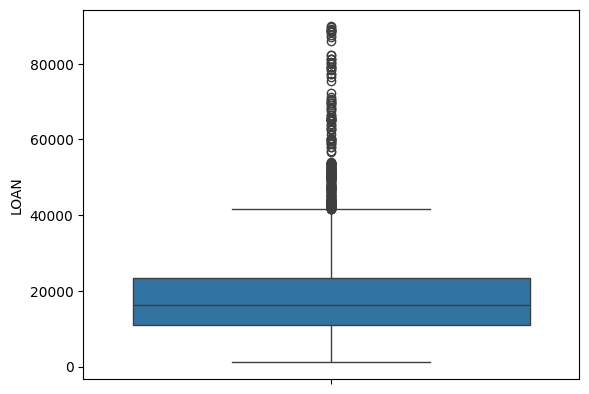

In [ ]:
#boxplot LOAN
sns.boxplot(data=hmeq, y='LOAN')
plt.show()

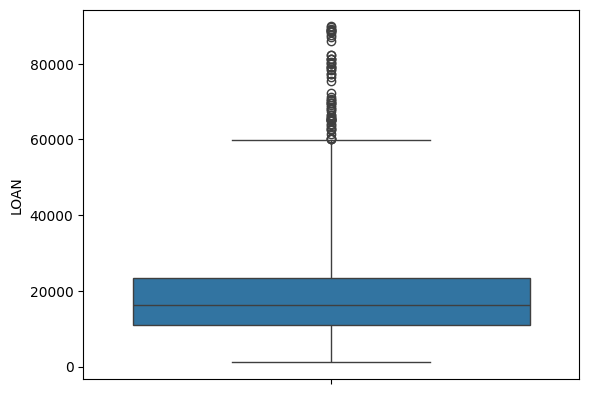

In [ ]:
# boxplot de LOAN en el que establecemos que el umbral para los valores atípicos sea 3 veces el IQR
sns.boxplot(data=hmeq, y='LOAN', whis=3)
plt.show()

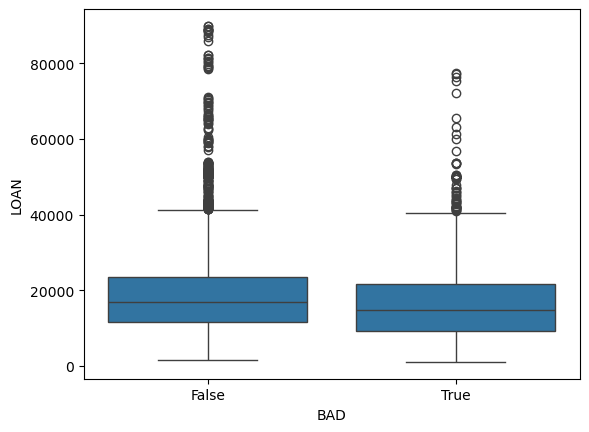

In [ ]:
# Boxplot of the feature LOAN grouped by the target variable BAD
sns.boxplot(data=hmeq, y='LOAN', x='BAD')
plt.show()

## Matriz de Correlación
La correlación es un concepto clave en el análisis multivariado. Mide la fuerza y ​​la dirección de una relación lineal entre dos variables numéricas. El coeficiente de correlación oscila entre -1 y 1. Un valor de 1 indica una relación lineal positiva perfecta, mientras que un valor de -1 indica una relación lineal negativa perfecta. Un valor de 0 indica que no existe relación lineal.

En un conjunto de datos como nuestro conjunto de datos HMEQ, es importante comprender la correlación entre las características. Por ejemplo, una alta correlación entre dos características podría indicar multicolinealidad. Esto representa un problema en el análisis de regresión, ya que puede generar estimaciones inestables de los coeficientes de regresión. La correlación de las características con la variable objetivo es fundamental. Por ejemplo, una alta correlación entre una característica y la variable objetivo podría indicar que la característica es un buen predictor de la variable objetivo.

Para hacer la matriz de correlación, podemos utilizar `corr()` de `Pandas`. Tengan en cuenta que este método generará un error si recibe datos no numéricos. Por lo tanto, primero seleccionamos las características según su tipo de dato mediante el método `select_dtypes()`. Excluir los atributos categóricos (es decir, REASON y JOB) evita problemas al aplicar el método `corr()`. Como resultado, obtenemos un marco de datos con todas las correlaciones pareadas entre las características numéricas, incluido el objetivo.

In [ ]:
corr= hmeq.select_dtypes(exclude='category').corr()
corr.round(3)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000,-0.075,-0.048,-0.030,-0.060,0.276,0.354,-0.170,0.175,-0.004,0.200
LOAN,-0.075,1.000,0.229,0.335,0.106,-0.001,-0.035,0.089,0.044,0.073,0.085
MORTDUE,-0.048,0.229,1.000,0.876,-0.088,-0.050,-0.001,0.140,0.031,0.324,0.155
VALUE,-0.030,0.335,0.876,1.000,0.008,-0.049,-0.014,0.171,-0.004,0.269,0.132
YOJ,-0.060,0.106,-0.088,0.008,1.000,-0.066,0.038,0.202,-0.072,0.025,-0.056
DEROG,0.276,-0.001,-0.050,-0.049,-0.066,1.000,0.212,-0.083,0.174,0.062,0.017
DELINQ,0.354,-0.035,-0.001,-0.014,0.038,0.212,1.000,0.022,0.068,0.165,0.052
CLAGE,-0.170,0.089,0.140,0.171,0.202,-0.083,0.022,1.000,-0.117,0.238,-0.046
NINQ,0.175,0.044,0.031,-0.004,-0.072,0.174,0.068,-0.117,1.000,0.088,0.141
CLNO,-0.004,0.073,0.324,0.269,0.025,0.062,0.165,0.238,0.088,1.000,0.186


Mirar tablas extensas de números es engorroso. Podemos visualizar la matriz de correlación mediante un mapa de calor. La biblioteca «seaborn» ofrece un método práctico para este propósito.

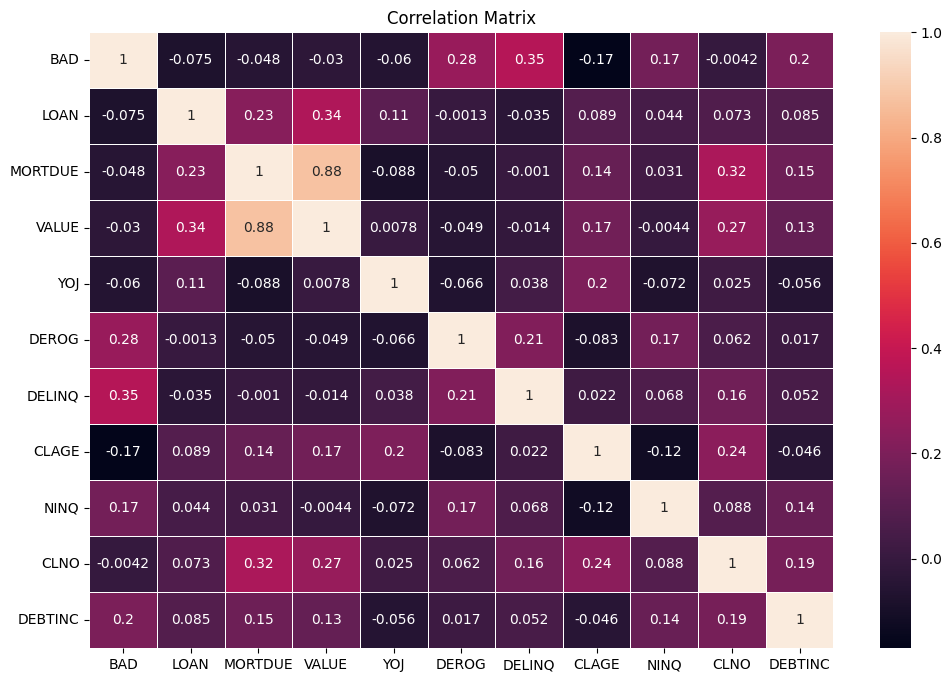

In [ ]:
f,ax = plt.subplots(figsize=(12, 8))  # La matriz necesita espacio. Entonces seteamos explicitamente el tamaño del gráfico
sns.heatmap(corr, annot=True,linewidth=.5)
plt.title('Correlation Matrix')
plt.show()


Aunque es mejor que mirar los números sin procesar, la matriz de correlación sigue siendo algo difícil de interpretar. Podemos mejorar la visualización resaltando las correlaciones altas (por ejemplo, superiores a un umbral definido por el usuario). Para ello, podemos usar el argumento `mask` en el método `heatmap()`.

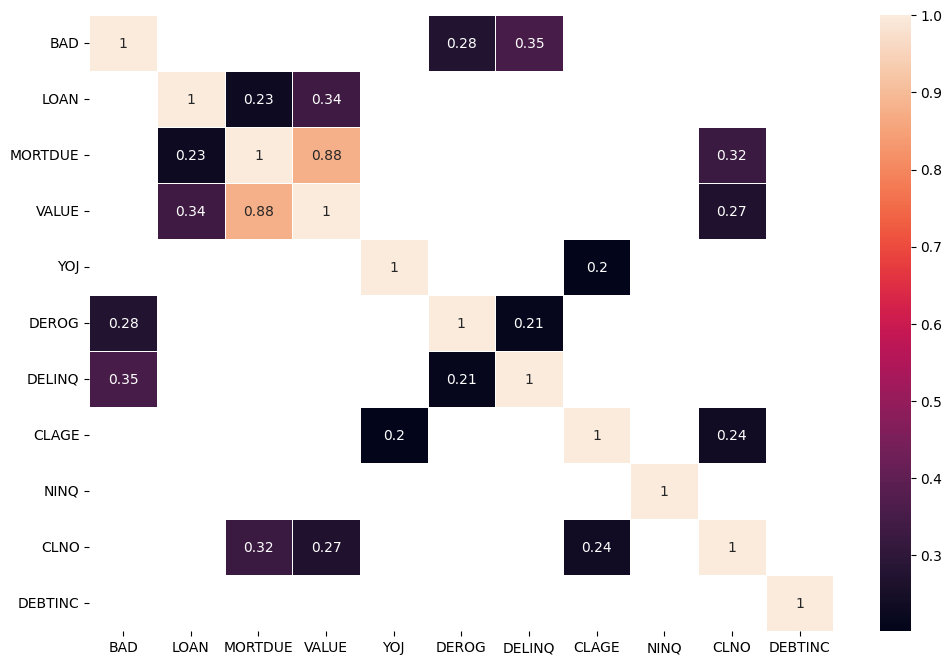

In [ ]:
# Crear una máscara de correlaciones por encima de un umbral especificado por el usuario
threshold = 0.20
mask = (corr <= threshold) & (corr >= -threshold)
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True, mask=mask, linewidth=.5)
plt.show()

